# Feature Preprocessing and Engieneering

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt

from pathlib import Path
import time

In [2]:
plt.rcParams['figure.figsize'] = [13, 5]

The representation of your data can have a bigger influence in the performance of your model than the type of model or the exact hyperparameters you use. This lecture is about feature preprocessing and feature engieneering.

## Pre-processing

Download the data: <br>
kaggle competitions download -c avazu-ctr-prediction

In [3]:
PATH = Path("avazu-ctr-prediction")
start = time.time()
data = pd.read_csv(PATH/"train")
print("time in minutes {}".format((time.time() - start)/60))

time in minutes 2.083285367488861


This data took a while to load. Let's investigate why.

In [4]:
data.shape

(40428967, 24)

In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 26.5 GB


The raw training data is 6G but pandas is using 26.5 GB. One of the reasons is that pandas is using int64 and object types. 

To reduce the memory usage: <br>
1. We can use smaller types for numerical columns. To select the appropiate type read here
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html. For example int8 is (-128 to 127).
2. Covert categorical variables into categorical type
3. You can drop columns that are not important (for example id)

In [6]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [7]:
data.describe() # look at min and max of every colunm. Can we change column types?

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
mean,9.223017e+18,1.698056e-01,1.410256e+07,1.004968e+03,2.880146e-01,1.015305e+00,3.313150e-01,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,5.325443e+18,3.754620e-01,2.966837e+02,1.094586e+00,5.063820e-01,5.274336e-01,8.547935e-01,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611181e+18,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.223224e+18,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.383561e+19,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,1.844674e+19,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [8]:
data["device_conn_type"].value_counts()

0    34886838
2     3317443
3     2181796
5       42890
Name: device_conn_type, dtype: int64

### Reducing memory usage from 25G to 3G.

In [17]:
types = {'id': np.uint32, 'click': np.uint8, 'hour': np.uint32, 'C1': np.uint32,
         'banner_pos': np.uint32, 'site_id': 'category', 'site_domain': 'category', 
         'site_category': 'category', 'app_id': 'category', 'app_domain': 'category',
         'app_category': 'category', 'device_id': 'category', 'device_ip': 'category',
         'device_model': 'category', 'device_type': np.uint8, 'device_conn_type': np.uint8,
         'C14': np.uint16, 'C15': np.uint16, 'C16': np.uint16, 'C17': np.uint16,
         'C18': np.uint16, 'C19': np.uint16, 'C20': np.uint16, 'C21': np.uint16}

start = time.time()
data = pd.read_csv(PATH/"train", usecols=types.keys(), dtype=types)
print("time in minutes {}".format((time.time() - start)/60))

time in minutes 7.3957926511764525


In [18]:
print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype   
---  ------            -----   
 0   id                uint32  
 1   click             uint8   
 2   hour              uint32  
 3   C1                uint32  
 4   banner_pos        uint32  
 5   site_id           category
 6   site_domain       category
 7   site_category     category
 8   app_id            category
 9   app_domain        category
 10  app_category      category
 11  device_id         category
 12  device_ip         category
 13  device_model      category
 14  device_type       uint8   
 15  device_conn_type  uint8   
 16  C14               uint16  
 17  C15               uint16  
 18  C16               uint16  
 19  C17               uint16  
 20  C18               uint16  
 21  C19               uint16  
 22  C20               uint16  
 23  C21               uint16  
dtypes: category(9), uint16(8), uint32(4), uint8(3)
m

### Writting data in feather file format
for fast reading

In [20]:
%time data.to_feather('data/data.fea')

CPU times: user 7.37 s, sys: 7.64 s, total: 15 s
Wall time: 4.17 s


In [22]:
%time data = pd.read_feather('data/data.fea')

CPU times: user 13.1 s, sys: 15.7 s, total: 28.7 s
Wall time: 20.8 s


### Splitting dataset based on time

Here is one example in which we should split the data based on time.

In [23]:
def split_based_hour(data):
    """ Split data based on column hour.
    
    Use 20% of the date for validation.
    Inputs:
       data: dataframe from avazu
    Returns:
       train:
       val_test: 30% of the largest values of column "hour".
    """
    N = int(0.7*len(data))
    data = data.sort_values(by="hour")
    train = data[:N].copy()
    val_test = data[N:].copy()
    val_test.reset_index(drop=True, inplace=True)
    val = val_test.sample(frac = 0.5)
    test = val_test.drop(val.index)
    return train.reset_index(drop=True), val.reset_index(drop=True), test.reset_index(drop=True)

In [24]:
train, val, test = split_based_hour(data)

In [25]:
train.shape, val.shape, test.shape

((28300276, 24), (6064346, 24), (6064345, 24))

In [14]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,2096162817,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,65535,79
1,1053958025,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,...,4,0,21665,320,50,2493,3,35,65535,117
2,3137661750,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,65535,79
3,2321962924,0,14102100,1005,1,85f751fd,c4e18dd6,50e219e0,d644e4e7,2347f47a,...,1,0,20751,320,50,1895,0,681,34492,101
4,3818779546,1,14102100,1005,0,929d2171,aa785047,3e814130,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,34539,117


In [15]:
# delete id column
def drop_column(train, val, test, col):
    train = train.drop(columns=[col])
    val = val.drop(columns=[col])
    test = test.drop(columns=[col])
    return train, val, test

train, val, test = drop_column(train, val, test, 'id')

In [16]:
def split_target(df, target):
    Y = df[target].values
    X = df.drop(columns=[target])
    return X, Y

<AxesSubplot:>

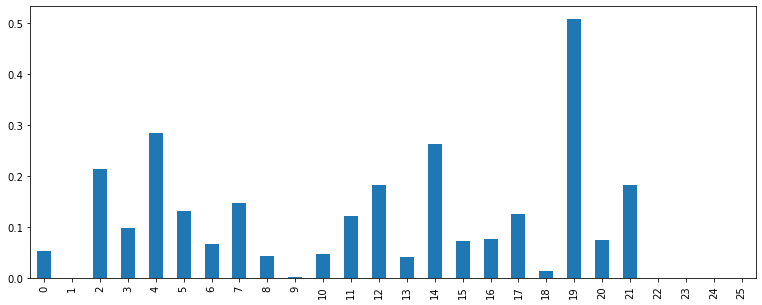

In [17]:
train.groupby(['site_category'])['click'].mean().reset_index()['click'].plot(kind='bar')

In [18]:
counts = train.groupby(['site_category']).size().reset_index(name='counts')
counts 

,site_category,counts
0,0569f928,12971
1,110ab22d,6
2,28905ebd,5551530
3,335d28a8,92102
4,3e814130,2338604
5,50e219e0,11073259
6,72722551,20658
7,75fa27f6,85706
8,76b2941d,55656
9,a818d37a,2638


In [19]:
def group_rare_categories(train, val, col, min_count=100):
    counts = train.groupby([col]).size().reset_index(name='counts')
    top_categories = counts[counts['counts'] > min_count]
    new_categories = top_categories[col].values
    train[col] = np.array([x if x in new_categories else 'UNK' for x in train[col].values])
    val[col] = np.array([x if x in new_categories else 'UNK' for x in val[col].values])
    return train, val

In [20]:
train, val = group_rare_categories(train, val, 'site_category', min_count=100)

In [21]:
freq_counts = train.groupby(['site_category']).size()

In [22]:
freq_counts = freq_counts/freq_counts.sum()

## Feature Engineering: Frequency encoding

Each category is replaced by the frequency of that category in the training data. Used for tree-based methods.
```
["a", "a", "a", "b", "c"]
```
is encoded as
```
[3/5, 3/5, 3/5, 1/5, 1/5]
```

In [23]:
train.shape

(28300276, 23)

In [24]:
train["site_category_freq"] = train["site_category"].map(freq_counts)

In [25]:
val["site_category_freq"] = val["site_category"].map(freq_counts)

In [26]:
train.shape

(28300276, 24)

In [27]:
# checking that there are not nas
val.site_category_freq.notna().sum(), val.shape

(6064346, (6064346, 24))

## Date and time features

* Periodicity
    * Day number in week, month, season, year, second, minute, hour
* Time since
* Difference between dates

In [28]:
train.hour.unique()

array([14102100, 14102101, 14102102, 14102103, 14102104, 14102105,
       14102106, 14102107, 14102108, 14102109, 14102110, 14102111,
       14102112, 14102113, 14102114, 14102115, 14102116, 14102117,
       14102118, 14102119, 14102120, 14102121, 14102122, 14102123,
       14102200, 14102201, 14102202, 14102203, 14102204, 14102205,
       14102206, 14102207, 14102208, 14102209, 14102210, 14102211,
       14102212, 14102213, 14102214, 14102215, 14102216, 14102217,
       14102218, 14102219, 14102220, 14102221, 14102222, 14102223,
       14102300, 14102301, 14102302, 14102303, 14102304, 14102305,
       14102306, 14102307, 14102308, 14102309, 14102310, 14102311,
       14102312, 14102313, 14102314, 14102315, 14102316, 14102317,
       14102318, 14102319, 14102320, 14102321, 14102322, 14102323,
       14102400, 14102401, 14102402, 14102403, 14102404, 14102405,
       14102406, 14102407, 14102408, 14102409, 14102410, 14102411,
       14102412, 14102413, 14102414, 14102415, 14102416, 14102

In [29]:
# hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
train['hour_enc'] = train['hour'].astype(str).str[-2:].astype(float)
val['hour_enc'] = val['hour'].astype(str).str[-2:].astype(float)
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,site_category_freq,hour_enc
0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,65535,79,0.196165,0.0
1,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,0f2161f8,...,21665,320,50,2493,3,35,65535,117,0.391277,0.0
2,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15707,320,50,1722,0,35,65535,79,0.196165,0.0
3,0,14102100,1005,1,85f751fd,c4e18dd6,50e219e0,d644e4e7,2347f47a,0f2161f8,...,20751,320,50,1895,0,681,34492,101,0.391277,0.0
4,1,14102100,1005,0,929d2171,aa785047,3e814130,ecad2386,7801e8d9,07d7df22,...,16920,320,50,1899,0,431,34539,117,0.082635,0.0


In [30]:
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,site_category_freq,hour_enc
0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15706,320,50,1722,0,35,65535,79,0.196165,0.0
1,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,ffc6ffd0,7801e8d9,0f2161f8,...,21665,320,50,2493,3,35,65535,117,0.391277,0.0
2,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,15707,320,50,1722,0,35,65535,79,0.196165,0.0
3,0,14102100,1005,1,85f751fd,c4e18dd6,50e219e0,d644e4e7,2347f47a,0f2161f8,...,20751,320,50,1895,0,681,34492,101,0.391277,0.0
4,1,14102100,1005,0,929d2171,aa785047,3e814130,ecad2386,7801e8d9,07d7df22,...,16920,320,50,1899,0,431,34539,117,0.082635,0.0


## Feature Engineering: Target or mean encoding
Use the target varible to generate features

In [31]:
data = pd.DataFrame({
        'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'y': [1, 1, 0, 0, 0]})
data

,state,y
0,Ohio,1
1,Ohio,1
2,Ohio,0
3,Nevada,0
4,Nevada,0


In [32]:
m = data["y"].groupby(data["state"]).mean()
m

state
Nevada    0.000000
Ohio      0.666667
Name: y, dtype: float64

In [33]:
data["state_mean_enc"] = data["state"].map(m)
data

,state,y,state_mean_enc
0,Ohio,1,0.666667
1,Ohio,1,0.666667
2,Ohio,0,0.666667
3,Nevada,0,0.000000
4,Nevada,0,0.000000


In [34]:
mean_site_cat = train["click"].groupby(train["site_category"]).mean()

In [35]:
mean_site_cat

site_category
0569f928    0.053118
28905ebd    0.212874
335d28a8    0.098022
3e814130    0.284072
42a36e14    0.262570
50e219e0    0.130750
5378d028    0.077220
70fb0e29    0.125162
72722551    0.066173
75fa27f6    0.146197
76b2941d    0.042493
8fd0aea4    0.074890
9ccfa2ea    0.013115
UNK         0.083333
a818d37a    0.003033
bcf865d9    0.047714
c0dd3be3    0.121048
dedf689d    0.506683
e787de0e    0.071993
f028772b    0.182875
f66779e6    0.041087
Name: click, dtype: float64

In [36]:
train["site_category_mean_enc"] = train["site_category"].map(mean_site_cat)

In [37]:
val["site_category_mean_enc"] = val["site_category"].map(mean_site_cat)

Note that mean encodoing needs to be computed on train and joined latter with validation and test.

Regularized mean encoding for the homework.

## Aggregate by one or multiple categorical features

Here are some fetures that we can compute
* Number of times `device_ip` appears on the training data. It would be better if we had `user_id`.
* Number of times `device_ip` appears per month on the training data.
* Min, max, average `C1` per `site_id`.

We can compute these features using `groupby` to aggregate to a new dataframe and then use `merge` to make the new feature.

### Categorical encoding can be slow. Let's three options

In [38]:
def hash_encode_cols(train, val, col):
    print("Encoding column ",col)
    train[col] = train[col].apply(hash).astype("int32")
    val[col] = val[col].apply(hash).astype("int32")

In [82]:
def label_encoding_with_NAs(train, val, col):
    train[col] = train[col].astype('category').cat.as_ordered()
    encoder = train[col].cat.categories
    # leaving 0 for NAs
    train[col] = train[col].cat.codes + 1
    val[col] = pd.Categorical(val[col], categories=encoder, ordered=True)
    val[col] = val[col].cat.codes + 1

In [88]:
t = pd.DataFrame({"x":["a", "b", "c"]})
v = pd.DataFrame({"x":["a", "b", "d", "f"]})

In [89]:
label_encoding_with_NAs(t, v, 'x')
t

,x
0,1
1,2
2,3


In [90]:
v

,x
0,1
1,2
2,0
3,0


In [91]:
from sklearn.preprocessing import LabelEncoder
def label_encoding_with_UNK(train, val, col, UNK=True):
    """ Returns a label encoding "UNK" values
    """
    le = LabelEncoder()
    uniq = np.unique(train[col])
    if UNK:
        uniq = np.concatenate((np.array(["UNK"]),uniq))
    le.fit(uniq)
    train[col] = le.transform(train[col])
    # this is very slow
    val_col = [x if x in le.classes_ else 'UNK' for x in val[col]]
    val[col] = le.transform(val_col)

In [46]:
col = "device_model"
t1 = train[[col, "click"]].copy()
v1 = val[[col ,"click"]].copy()

In [47]:
start = time.time()
label_encoding_with_UNK(t1, v1, col)
print((time.time()-start)/60)

21.99831166664759


In [48]:
t2 = train[[col,"click"]].copy()
v2 = val[[col,"click"]].copy()

In [50]:
start = time.time()
hash_encode_cols(t2, v2, col)
print((time.time()-start)/60)

Encoding column  device_model
0.18471803267796835


In [92]:
col = "device_model"
t3 = train[[col,"click"]].copy()
v3 = val[[col,"click"]].copy()
start = time.time()
label_encoding_with_NAs(t3, v3, col)
print((time.time()-start)/60)

0.031988346576690675


In [58]:
t1.head()

,device_model,click
0,2083,0
1,7393,0
2,3016,0
3,1870,0
4,3349,1


In [59]:
t2.head()

,device_model,click
0,334459959,0
1,-1935461200,0
2,-1834047099,0
3,273135860,0
4,1838021296,1


In [93]:
t3.head()

,device_model,click
0,4647,0
1,409,0
2,614,0
3,4546,0
4,7316,1


In [60]:
col = "device_model"
hash_encode_cols(train, val, col)

Encoding column  device_model


## BABY Baseline model random forest model

In [61]:
features = ["site_category_freq", "hour_enc", "site_category_mean_enc", "device_model"]

In [62]:
y_train = train.click.values
y_val = val.click.values

In [63]:
x_train = train[features]
x_val = val[features]
x_train.head()

,site_category_freq,hour_enc,site_category_mean_enc,device_model
0,0.196165,0.0,0.212874,334459959
1,0.391277,0.0,0.130750,-1935461200
2,0.196165,0.0,0.212874,-1834047099
3,0.391277,0.0,0.130750,273135860
4,0.082635,0.0,0.284072,1838021296


In [64]:
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [65]:
def get_random_values_hyperparameters():
    min_samples_leaf = np.random.randint(low=50, high=100, size=1)[0]
    max_features = np.random.uniform(0.1,0.6)
    max_depth = np.random.randint(low=6, high=20, size=1)[0]
    return min_samples_leaf, max_features, max_depth

In [66]:
get_random_values_hyperparameters()

(71, 0.2599682147699258, 7)

In [67]:
# you want to look for the simplest model with the best val AUC or val loss
for i in range(15):
    h1, h2, h3 = get_random_values_hyperparameters()
    rf = RandomForestClassifier(n_jobs = -1, n_estimators=20, min_samples_leaf=h1,
                                 max_features=h2, max_depth=h3, verbose=1)
    rf.fit(x_train, y_train)
    y_hat_train = rf.predict_proba(x_train)[:,1]
    y_hat_val = rf.predict_proba(x_val)[:,1]
    print("min_samples_leaf %d, max_features %.1f, max_depth %d" % (h1, h2, h3))
    print("   train loss %.2f, val loss %.2f" % (log_loss(y_train, y_hat_train),
          log_loss(y_val, y_hat_val)))
    print("   train auc %.2f, val auc %.2f" % (roc_auc_score(y_train, y_hat_train),
          roc_auc_score(y_val, y_hat_val)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  4.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.2min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    7.4s remaining:    7.4s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:   10.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    3.7s finished


min_samples_leaf 79, max_features 0.5, max_depth 18
   train loss 0.44, val loss 0.42
   train auc 0.66, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.6min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.3min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    7.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    1.8s finished


min_samples_leaf 86, max_features 0.2, max_depth 10
   train loss 0.45, val loss 0.42
   train auc 0.63, val auc 0.62


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  4.3min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.7min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    7.3s remaining:    7.3s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    9.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    2.0s remaining:    2.0s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.7s finished


min_samples_leaf 57, max_features 0.6, max_depth 14
   train loss 0.44, val loss 0.42
   train auc 0.65, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.4min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.1min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    5.2s remaining:    5.2s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    6.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    1.8s finished


min_samples_leaf 68, max_features 0.5, max_depth 9
   train loss 0.45, val loss 0.42
   train auc 0.62, val auc 0.61


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  4.6min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.0min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    6.7s remaining:    6.7s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    9.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.8s finished


min_samples_leaf 58, max_features 0.6, max_depth 16
   train loss 0.44, val loss 0.42
   train auc 0.66, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.8min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    4.9s remaining:    4.9s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    6.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    1.8s finished


min_samples_leaf 68, max_features 0.4, max_depth 11
   train loss 0.45, val loss 0.42
   train auc 0.63, val auc 0.62


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  4.0min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.9min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    8.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.8s finished


min_samples_leaf 58, max_features 0.5, max_depth 16
   train loss 0.44, val loss 0.42
   train auc 0.65, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.7min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.9min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.5s remaining:    1.5s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.0s finished


min_samples_leaf 52, max_features 0.4, max_depth 12
   train loss 0.45, val loss 0.42
   train auc 0.64, val auc 0.62


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  4.7min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.2min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    8.3s remaining:    8.3s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:   11.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    2.1s remaining:    2.1s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    3.0s finished


min_samples_leaf 98, max_features 0.6, max_depth 17
   train loss 0.44, val loss 0.42
   train auc 0.66, val auc 0.64


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  3.7min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.8min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    8.4s remaining:    8.4s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:   11.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    4.1s finished


min_samples_leaf 89, max_features 0.1, max_depth 18
   train loss 0.44, val loss 0.42
   train auc 0.66, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  3.4min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.3min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    6.3s remaining:    6.3s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.2s finished


min_samples_leaf 88, max_features 0.2, max_depth 12
   train loss 0.44, val loss 0.42
   train auc 0.64, val auc 0.62


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  3.3min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.3min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    6.5s remaining:    6.5s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    8.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.8s remaining:    1.8s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.7s finished


min_samples_leaf 55, max_features 0.5, max_depth 15
   train loss 0.44, val loss 0.42
   train auc 0.65, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  2.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    4.6s remaining:    4.6s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    1.6s finished


min_samples_leaf 96, max_features 0.5, max_depth 7
   train loss 0.45, val loss 0.42
   train auc 0.62, val auc 0.61


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  3.3min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.4min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    5.8s remaining:    5.8s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    7.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.3s finished


min_samples_leaf 59, max_features 0.3, max_depth 13
   train loss 0.44, val loss 0.42
   train auc 0.64, val auc 0.63


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  3.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.0min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    6.1s remaining:    6.1s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    8.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  20 | elapsed:    1.6s remaining:    1.6s
[Parallel(n_jobs=16)]: Done  20 out of  20 | elapsed:    2.1s finished


min_samples_leaf 94, max_features 0.4, max_depth 13
   train loss 0.44, val loss 0.42
   train auc 0.64, val auc 0.62
